In [2]:
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score


In [3]:
data = {
    "Age": ["Young","Young","Middle","Senior","Senior","Middle"],
    "Income": ["High","High","Medium","Low","Low","Medium"],
    "Student": ["No","No","No","Yes","Yes","Yes"],
    "Credit_Rating": ["Fair","Excellent","Fair","Fair","Excellent","Excellent"],
    "Buy": ["No","No","Yes","Yes","No","Yes"]
}

df = pd.DataFrame(data)
df


,Age,Income,Student,Credit_Rating,Buy
0,Young,High,No,Fair,No
1,Young,High,No,Excellent,No
2,Middle,Medium,No,Fair,Yes
3,Senior,Low,Yes,Fair,Yes
4,Senior,Low,Yes,Excellent,No
5,Middle,Medium,Yes,Excellent,Yes


In [4]:
encoder = LabelEncoder()

for col in df.columns:
    df[col] = encoder.fit_transform(df[col])

df


,Age,Income,Student,Credit_Rating,Buy
0,2,0,0,1,0
1,2,0,0,0,0
2,0,2,0,1,1
3,1,1,1,1,1
4,1,1,1,0,0
5,0,2,1,0,1


In [5]:
X = df.drop("Buy", axis=1)
y = df["Buy"]


In [6]:
model = DecisionTreeClassifier(criterion="gini")
model.fit(X, y)


DecisionTreeClassifier()

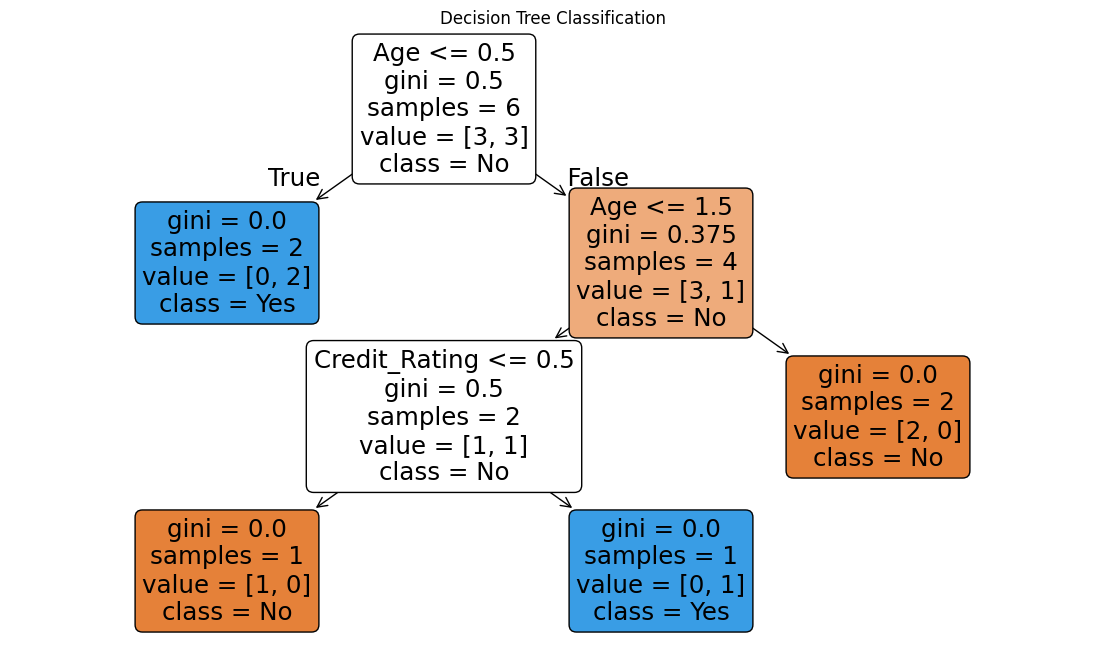

In [7]:
plt.figure(figsize=(14,8))
plot_tree(
    model,
    feature_names=X.columns,
    class_names=["No","Yes"],
    filled=True,
    rounded=True
)
plt.title("Decision Tree Classification")
plt.show()


In [8]:
predictions = model.predict(X)

results = pd.DataFrame({
    "Actual": y,
    "Predicted": predictions
})

results


,Actual,Predicted
0,0,0
1,0,0
2,1,1
3,1,1
4,0,0
5,1,1


In [9]:
accuracy = accuracy_score(y, predictions)
print("Model Accuracy:", accuracy)


Model Accuracy: 1.0
